
Importing libraries

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

Data Collection

In [110]:
df = pd.read_csv("spam[1].csv", encoding = 'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Data Cleaning

In [111]:
df = df.drop(columns=df.columns[2:5])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [112]:
df.columns = ['Category', 'Message']
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [113]:
df.isnull().sum()


Category    0
Message     0
dtype: int64

In [114]:
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [115]:
df.nunique()


Category       2
Message     5169
dtype: int64

EDA

In [116]:
df.info


<bound method DataFrame.info of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham              Will Ì_ b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [117]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


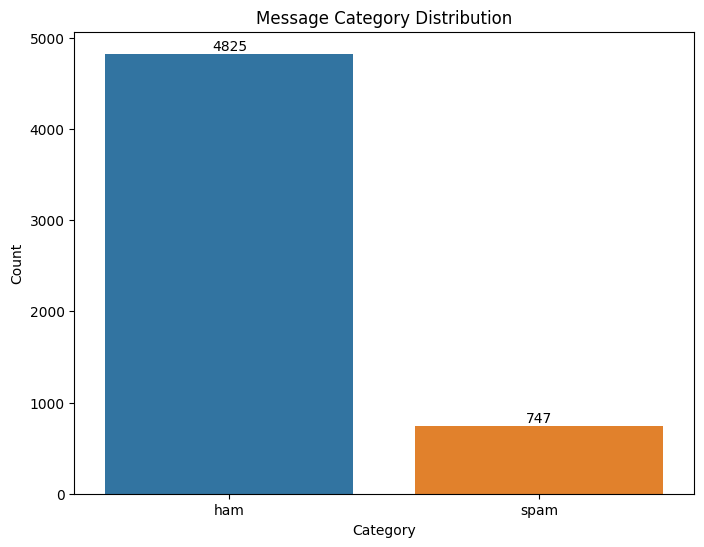

In [118]:
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Count', data=category_counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Message Category Distribution')

# Add text with counts on the bars
for i, count in enumerate(category_counts['Count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [119]:
df['spam']= df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


Split data into training and testing sets

In [120]:
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam, train_size=.8)

In [121]:
y_train

2371    0
2775    0
5199    0
1620    0
4361    0
       ..
2703    0
4322    0
4358    0
129     0
2920    0
Name: spam, Length: 4457, dtype: int64

In [122]:
X_train

2371    Hmm, too many of them unfortunately... Pics ob...
2775                      We confirm eating at esplanade?
5199           Ugh my leg hurts. Musta overdid it on mon.
1620    Fuck babe, I miss you sooooo much !! I wish yo...
4361    I can't right this second, gotta hit people up...
                              ...                        
2703    Yup no more already... Thanx 4 printing n hand...
4322                          Aight well keep me informed
4358                 ÌÏ only send me the contents page...
129                          K..k:)how much does it cost?
2920      Yo, any way we could pick something up tonight?
Name: Message, Length: 4457, dtype: object

Create a CountVectorizer for text feature extraction

In [123]:
from sklearn.feature_extraction.text import CountVectorizer
featurizer = CountVectorizer()
X_train_count = featurizer.fit_transform(X_train.values)

In [124]:
X_train_count

<4457x7735 sparse matrix of type '<class 'numpy.int64'>'
	with 59458 stored elements in Compressed Sparse Row format>

Create the Multinomial Naive Bayes model

In [125]:
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [126]:
emails = [
    'Hey Mohamed, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = featurizer.transform(emails)
model.predict(emails_count)

array([0, 1])

In [127]:
X_test_count = featurizer.transform(X_test)
model.score(X_test_count, y_test)

0.9847533632286996

Create the Sklearn Pipeline Model

In [128]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [129]:
clf.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [130]:
clf.score(X_test,y_test)

0.9847533632286996

In [131]:
clf.predict(emails)


array([0, 1])